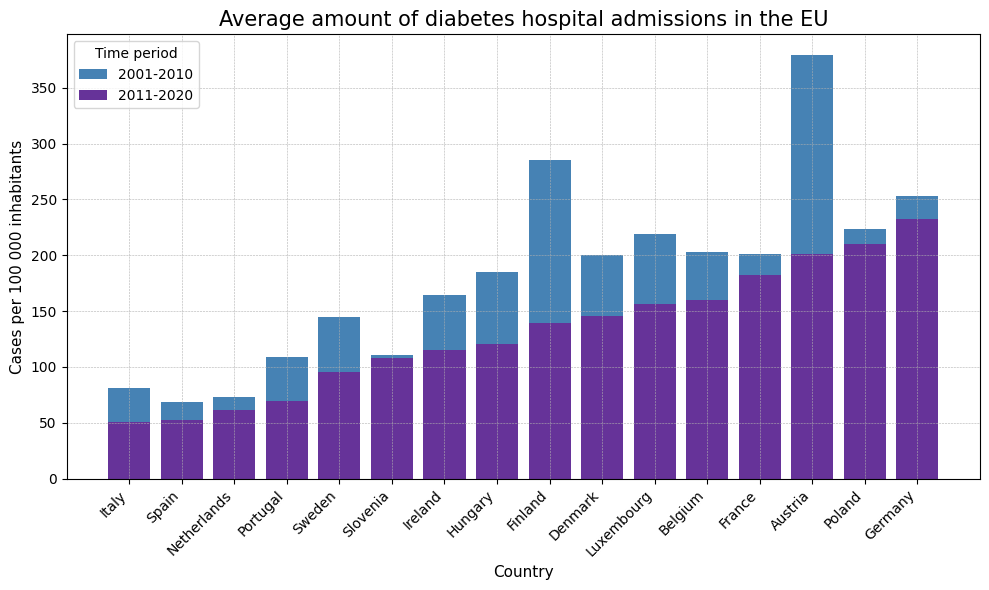

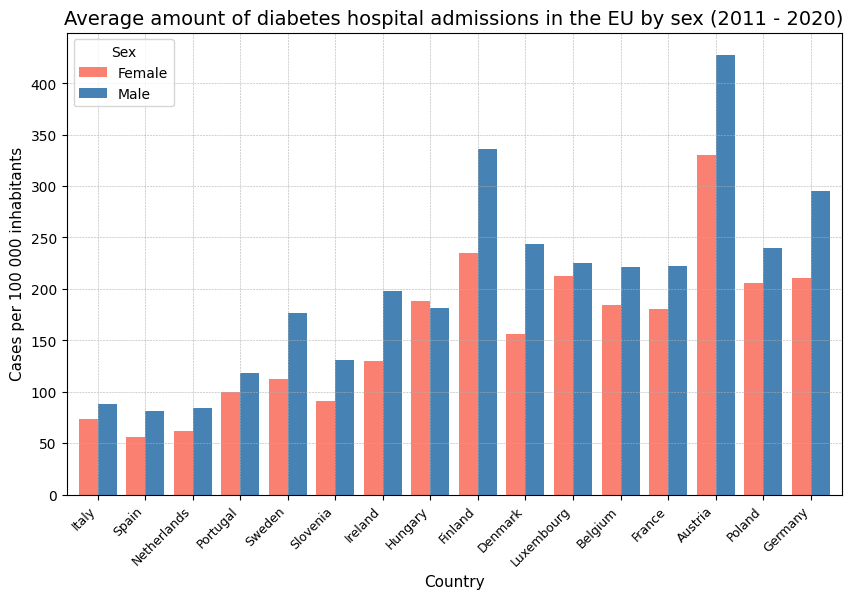

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_diabetes_cases(dataset: str,
                        interval_before: list[int],
                        interval_after: list[int],
                        ) -> None:
    """
    Generates two bar plots based on the population of countries in the European Union: 
    
    - first plot compares the amount of diabetes cases per 100 000 inhabitants within
    two specified time intervals using mean values (for a descriptive representation 
    recommended to use for relatively short time intervals);
    
    - second plot splits the cases of the more recent time interval by sex.
    
    Required parameters:
    --------------------
            dataset (str): The filepath of the used dataset.
            interval_before (list[int]): The earlier time interval, 
                                         expects two integer values in ascending order. 
            interval_after (list[int]): The later time interval, 
                                        expects two integer values in ascending order. 

    Returns:
    --------
            None: Both generated bar plot.
    """

    #Dataset preprocessing
    healthcare_quality = pd.read_csv(dataset)
    healthcare_quality = healthcare_quality.drop(['Observation value'], axis = 1)
    healthcare_quality = healthcare_quality.rename(columns = {'Reference area': 'Country',
                                                              'TIME_PERIOD': 'Year',
                                                              'OBS_VALUE': 'Observation value'}) 
    #Filter out data for the first plot
    diabetes_cases = healthcare_quality.loc[healthcare_quality['Measure'] == 
                                            'Diabetes hospital admission']
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Unit of measure'] == 
                                        'Per 100 000 inhabitants']
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Sex'] != 'Total']
    
    #Filter out countries of the European Union
    EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
          'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
          'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 
          'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
    diabetes_cases = diabetes_cases.loc[diabetes_cases['Country'].isin(EU)]

    #Split data based on defined time intervals
    diabetes_before = diabetes_cases.loc[(diabetes_cases['Year']>=interval_before[0]) &
                                         (diabetes_cases['Year']<=interval_before[1])]
    diabetes_after  = diabetes_cases.loc[(diabetes_cases['Year']>=interval_after[0]) &
                                         (diabetes_cases['Year']<=interval_after[1])]

    #Final preparation for plots
    diabetes_by_sex = diabetes_before.groupby(['Country', 
                                               'Sex'])['Observation value'].mean().unstack()
    diabetes_by_sex = diabetes_by_sex.dropna()
    
    diabetes_after = diabetes_after.groupby(['Country'])['Observation value'].mean()
    diabetes_before = diabetes_before.groupby(['Country'])['Observation value'].mean()
    diabetes_before = diabetes_before.dropna()
    diabetes_after = diabetes_after.dropna()

    #Align countries to plot overlaping bars and to keep the same order
    #in the second plot
    diabetes_after = diabetes_after.sort_values()
    diabetes_after, diabetes_before = diabetes_after.align(diabetes_before, 
                                                           join = 'inner')
    diabetes_after, diabetes_by_sex = diabetes_after.align(diabetes_by_sex, 
                                                           join = 'inner')

    #Generate the first plot
    fig1, ax = plt.subplots(figsize = (10,6))
    ax.bar(diabetes_before.index, diabetes_before, 
           label = f'{interval_before[0]}-{interval_before[1]}', 
           align = 'center', 
           color = 'steelblue', 
           width = 0.8)
    ax.bar(diabetes_after.index, diabetes_after, 
           label = f'{interval_after[0]}-{interval_after[1]}', 
           align = 'center', 
           color = 'rebeccapurple', 
           width = 0.8)
    ax.set_xlabel('Country',
                  fontsize = 11)
    ax.set_ylabel('Cases per 100 000 inhabitants',
                  fontsize = 11)
    ax.set_title('Average amount of diabetes hospital admissions in the EU', 
                 fontsize = 15)
    ax.legend(title = 'Time period',
             loc = 'upper left')
    ax.grid(linestyle = '--'
            linewidth = 0.4,
            axis = 'y')
    plt.xticks(rotation = 45, 
               ha='right',
               fontsize = 10)
    plt.tight_layout()
    plt.show()

    #Generate the second plot
    diabetes_by_sex.plot(kind = 'bar',  
                           align = 'center', 
                           color = ['salmon','steelblue'], 
                           width  = 0.8,
                           figsize = (10,6))
    plt.title('Average amount of diabetes hospital admissions in the EU '\
              f'by sex ({interval_after[0]} - {interval_after[1]})', 
               fontsize = 14)
    plt.ylabel('Cases per 100 000 inhabitants', 
               fontsize = 11)
    plt.xlabel('Country', 
               fontsize = 11)
    plt.xticks(rotation = 45, 
               ha='right',
               fontsize = 9)
    plt.legend(title = 'Sex')
    plt.grid(linestyle = '--', 
             linewidth = 0.4,
             axis = 'y')
    plt.show()
    
#Call the function
plot_diabetes_cases(r"C:\Users\Dana\OneDrive\Desktop\assignment2\Healthcare_quality_and_outcomes.csv",
                    [2001, 2010],
                    [2011, 2020])